In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
datadept = pd.read_csv("donnees_biens_associe_dept.csv",delimiter=';', index_col= [0])
datadept.head()

,INSEE_COM,Nom_DEPT,Nb_mutations,NbMaisons,NbApparts,propmaison,propappart,PrixMoyen,Prixm2Moyen,SurfaceMoy
1,1001,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,1002,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,1004,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,1005,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,1007,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [3]:
datadept = datadept.dropna()
datadept.count()

INSEE_COM       30010
Nom_DEPT        30010
Nb_mutations    30010
NbMaisons       30010
NbApparts       30010
propmaison      30010
propappart      30010
PrixMoyen       30010
Prixm2Moyen     30010
SurfaceMoy      30010
dtype: int64

In [4]:
datadept = datadept.drop(columns = ['INSEE_COM'])
datadept.head()

,Nom_DEPT,Nb_mutations,NbMaisons,NbApparts,propmaison,propappart,PrixMoyen,Prixm2Moyen,SurfaceMoy
1,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [5]:
##Transformation de la variable cartégorielle en numerique

datadept['Nom_DEPT'] = datadept['Nom_DEPT'].astype('category').cat.codes

In [6]:
# Utiliser toutes les colonnes sauf 'prix moyen' comme caractéristiques

X = datadept.drop(columns = ['PrixMoyen'])

# Utiliser 'prix moyen' comme la colonne cible

y = datadept['PrixMoyen']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# 4. Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Application du modèle K-NN pour la régression
k = 3
#instance du modèle KNeighborsRegressor de la bibliothèque sklearn 
# pour la régression K-NN.
knn = KNeighborsRegressor(n_neighbors=k) 
#Entrainement du modèle  et ajustement.
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [9]:
# Prédiction sur l'ensemble de test
y_pred = knn.predict(X_test)

In [10]:
# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 691010452.68
Root Mean Squared Error (RMSE): 26287.08
R² Score: 0.94


###### En moyenne les carrés des erreurs de prédiction sont de 691010452.68 unités au carrées.
###### La prédiction du modèle s'écarte en moyenne de 26287.08 unités du prix réel
###### 94% de la variance des prix est expliquée par le modèle.

In [11]:
# Comparaison des valeurs réelles et prédites
comparaison_des_valeurs = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparaison_des_valeurs.head())

              Actual      Predicted
11960  211509.855263  218981.954475
24284   93500.000000  103577.777778
23985   87363.142857  107805.416667
28140  191881.212500  262217.908422
16636  104800.000000   99683.333333


###### Interprètation : pour un échantillon de 11960 Valeur réelle : 211509.86
##### Valeur prédite : 218981.95
###### Interprétation : La prédiction est assez proche de la valeur réelle, avec une légère surestimation de 7472.10

## FONCTION DE PREDICTION DU PRIX MOYEN VENDU DES BIENS SELON LES DEPARTEMENTS DE LA FRANCE

In [35]:
# Fonction de prédiction
def knn_predict(new_data, k=3):
    # Normaliser les nouvelles données
    new_data_scaled = scaler.transform(new_data)
    
    # Créer le modèle K-NN
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Entraîner le modèle sur les données existantes
    knn.fit(X_train, y_train)
    
    # Prédire les valeurs pour les nouvelles données
    predictions = knn.predict(new_data_scaled)
    
    return predictions

In [13]:
datadept.head()

,Nom_DEPT,Nb_mutations,NbMaisons,NbApparts,propmaison,propappart,PrixMoyen,Prixm2Moyen,SurfaceMoy
1,1,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,1,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,1,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,1,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,1,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [14]:
datadept.count()

Nom_DEPT        30010
Nb_mutations    30010
NbMaisons       30010
NbApparts       30010
propmaison      30010
propappart      30010
PrixMoyen       30010
Prixm2Moyen     30010
SurfaceMoy      30010
dtype: int64

In [36]:
# Test de la fonction de prédiction
new_data = pd.DataFrame({
    'Nom_DEPT': [0, 1],  # codes des départements
    'Nb_mutations': [10, 50],
    'NbMaisons': [8.0, 45.0],
    'NbApparts': [2.0, 8.0],
    'propmaison': [80.0, 90.0],
    'propappart': [20.0, 10.0],
    'Prixm2Moyen': [2500.0, 3000.0],
    'SurfaceMoy': [100.0, 150.0]
})

predictions = knn_predict(new_data)
print(predictions)

[233381.26851852 342300.89590965]


##### Interpretation : Analyse des Prédictions

###### Première Prédiction : 
###### Pour une région (département codé 0) avec 10 mutations, 8 maisons vendus, 2 appartements vendus, 80% ventes de maison, 20% vente d'appartement,  un prix moyen au mètre carré de 2500.0 et une surface moyenne de 100.0, le modèle prédit un prix moyen de 249032.45.

###### Deuxième Prédiction :  
###### Pour une région (département codé 1) avec 50 mutations, 45 maisons, 5 appartements, un prix moyen au mètre carré de 3000.0 et une surface moyenne de 150.0, le modèle prédit un prix moyen de 362600.28.

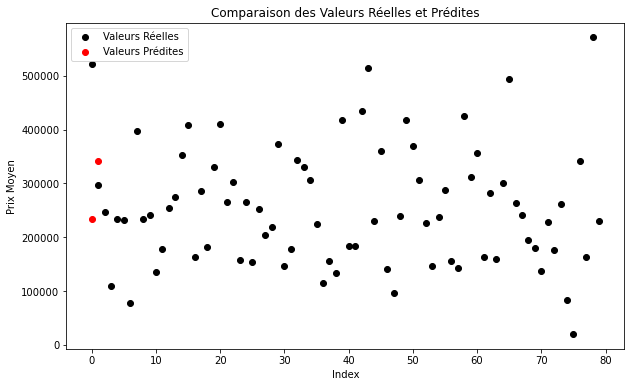

In [37]:
# Valeurs réelles
y_test_values = y_test.values

# Créer un graphique
plt.figure(figsize=(10, 6))

# Tracer les valeurs réelles
plt.scatter(range(len(y_test_values)), y_test_values, color='black', label='Valeurs Réelles')

# Tracer les valeurs prédites
plt.scatter(range(len(predictions)), predictions, color='red', label='Valeurs Prédites')

# Ajouter des titres et légendes
plt.title('Comparaison des Valeurs Réelles et Prédites')
plt.xlabel('Index')
plt.ylabel('Prix Moyen')
plt.legend()

# Afficher le graphique
plt.show()


### LE CAS DE LA SAVOIE

In [17]:
# chargement du fichier : 

dt_Savoie_knn = pd.read_csv("donnee_bienvendu_depart.csv",delimiter=';', index_col= [0])
dt_Savoie_knn.head()

,Nom_com,Id_commune,DEPT,nombre_mutations,nbr_vente_maison,nbr_vente_appartement,proportion_ventes_maisons,proportion_ventes_appartements,prix_moyen_biens_vendus,prix_moyen_m2_biens_vendus,surface_moyenne_biens_vendus
1,ABERGEMENT CLEMENCIAT,1001,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,ABERGEMENT DE VAREY,1002,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,AMBERIEU EN BUGEY,1004,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,AMBERIEUX EN DOMBES,1005,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,AMBRONAY,1007,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [18]:
dt_Savoie_knn = dt_Savoie_knn.drop(columns = ['Id_commune'])
dt_Savoie_knn.head()

,Nom_com,DEPT,nombre_mutations,nbr_vente_maison,nbr_vente_appartement,proportion_ventes_maisons,proportion_ventes_appartements,prix_moyen_biens_vendus,prix_moyen_m2_biens_vendus,surface_moyenne_biens_vendus
1,ABERGEMENT CLEMENCIAT,Ain,8,8.0,0.0,100.000000,0.000000,269375.000000,2249.500000,118.125000
2,ABERGEMENT DE VAREY,Ain,2,2.0,0.0,100.000000,0.000000,199350.000000,1913.500000,96.000000
3,AMBERIEU EN BUGEY,Ain,158,89.0,69.0,56.329114,43.670886,210114.639241,2399.620253,89.639241
4,AMBERIEUX EN DOMBES,Ain,27,22.0,5.0,81.481481,18.518519,357840.259259,3287.962963,109.185185
5,AMBRONAY,Ain,39,38.0,1.0,97.435897,2.564103,231436.461538,2274.871795,105.230769


In [19]:

# Filtrage des données pour ne garder que celles du département de la Savoie

dt_Savoie_knn = dt_Savoie_knn[dt_Savoie_knn['DEPT'] == 'Savoie']
dt_Savoie_knn.head()

,Nom_com,DEPT,nombre_mutations,nbr_vente_maison,nbr_vente_appartement,proportion_ventes_maisons,proportion_ventes_appartements,prix_moyen_biens_vendus,prix_moyen_m2_biens_vendus,surface_moyenne_biens_vendus
24313,AIGUEBELETTE LE LAC,Savoie,2,2.0,0.0,100.000000,0.000000,512397.500000,3392.000000,158.500000
24314,GRAND AIGUEBLANCHE,Savoie,32,17.0,15.0,53.125000,46.875000,232641.250000,2878.843750,82.625000
24315,AILLON LE JEUNE,Savoie,26,6.0,20.0,23.076923,76.923077,102500.192308,2339.230769,41.884615
24316,AILLON LE VIEUX,Savoie,1,0.0,1.0,0.000000,100.000000,101250.000000,596.000000,170.000000
24317,AIME LA PLAGNE,Savoie,118,28.0,90.0,23.728814,76.271186,196566.567797,4211.601695,49.033898


In [20]:
## Supprimons la colonne département et procédons à la transformation des commune en variable cartégorielle

dt_Savoie_knn = dt_Savoie_knn.drop(columns = ['DEPT'])


##Transformation de la variable cartégorielle en numerique

dt_Savoie_knn['Nom_com'] = dt_Savoie_knn['Nom_com'].astype('category').cat.codes

dt_Savoie_knn.head()

,Nom_com,nombre_mutations,nbr_vente_maison,nbr_vente_appartement,proportion_ventes_maisons,proportion_ventes_appartements,prix_moyen_biens_vendus,prix_moyen_m2_biens_vendus,surface_moyenne_biens_vendus
24313,0,2,2.0,0.0,100.000000,0.000000,512397.500000,3392.000000,158.500000
24314,102,32,17.0,15.0,53.125000,46.875000,232641.250000,2878.843750,82.625000
24315,1,26,6.0,20.0,23.076923,76.923077,102500.192308,2339.230769,41.884615
24316,2,1,0.0,1.0,0.000000,100.000000,101250.000000,596.000000,170.000000
24317,3,118,28.0,90.0,23.728814,76.271186,196566.567797,4211.601695,49.033898


In [21]:
variable_df = dt_Savoie_knn.loc[dt_Savoie_knn['Nom_com'] == 1]

# Afficher le DataFrame filtré
print(variable_df)

       Nom_com  nombre_mutations  nbr_vente_maison  nbr_vente_appartement  \
24315        1                26               6.0                   20.0   

       proportion_ventes_maisons  proportion_ventes_appartements  \
24315                  23.076923                       76.923077   

       prix_moyen_biens_vendus  prix_moyen_m2_biens_vendus  \
24315            102500.192308                 2339.230769   

       surface_moyenne_biens_vendus  
24315                     41.884615  


In [22]:
# Utiliser toutes les colonnes sauf 'Nom_DEPT' comme caractéristiques

X = dt_Savoie_knn.drop(columns = ['prix_moyen_biens_vendus'])

# Utiliser 'Nom_DEPT' comme la colonne cible

y = dt_Savoie_knn['prix_moyen_biens_vendus']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# 4. Normalisation des données

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [24]:
# Application du modèle K-NN pour la régression
k = 3

knn = KNeighborsRegressor(n_neighbors=k)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [25]:
# Prédiction sur l'ensemble de test

y_pred = knn.predict(X_test)

In [26]:
# Évaluation du modèle

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 2882923266.83
Root Mean Squared Error (RMSE): 53692.86
R² Score: 0.77


###### En moyenne les carrés des erreurs de prédiction sont de 2882923266.83 unités au carrées.
###### La prédiction du modèle s'écarte en moyenne de 53692.86 unités du prix réel
###### 77% de la variance des prix est expliquée par le modèle.

In [27]:
# Comparaison des valeurs réelles et prédites
comparaison_des_valeursSavoie = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparaison_des_valeursSavoie.head())

              Actual      Predicted
24492  522076.740741  396997.309683
24428  297610.625000  330804.868946
24409  247035.555556  251423.937500
24337  110000.000000  161807.222222
24322  234055.000000  229761.111111


In [28]:
# Fonction de prédiction
def knn_predict_Savoie(new_data, k=3):
    # Normaliser les nouvelles données
    new_data_scaled = scaler.transform(new_data)
    
    # Créer le modèle K-NN
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Entraîner le modèle sur les données existantes
    knn.fit(X_train, y_train)
    
    # Prédire les valeurs pour les nouvelles données
    predictions_Savoie = knn.predict(new_data_scaled)
    
    return predictions_Savoie

In [29]:
# Test de la fonction de prédiction

new_data = pd.DataFrame({
    'Nom_DEPT': [0, 1],  # Assurez-vous que les départements sont codés de la même manière
    'Nb_mutations': [10, 50],
    'NbMaisons': [8.0, 45.0],
    'NbApparts': [2.0, 5.0],
    'propmaison': [80.0, 90.0],
    'propappart': [20.0, 10.0],
    'Prixm2Moyen': [2500.0, 3000.0],
    'SurfaceMoy': [100.0, 150.0]
})

predictions_Savoie = knn_predict(new_data)
print(predictions_Savoie)

[233381.26851852 342300.89590965]


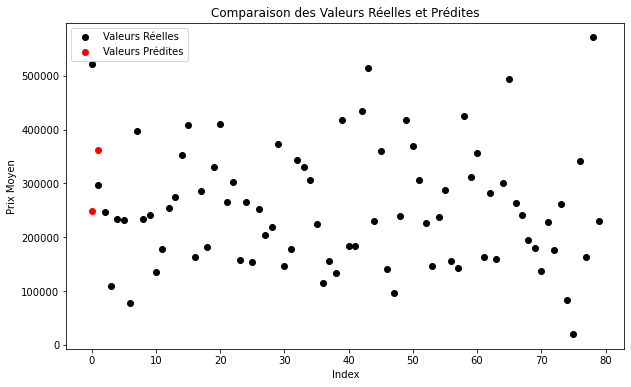

In [30]:
# Valeurs réelles
y_test_values = y_test.values

# Créer un graphique
plt.figure(figsize=(10, 6))

# Tracer les valeurs réelles
plt.scatter(range(len(y_test_values)), y_test_values, color='black', label='Valeurs Réelles')

# Tracer les valeurs prédites
plt.scatter(range(len(predictions)), predictions, color='red', label='Valeurs Prédites')

# Ajouter des titres et légendes
plt.title('Comparaison des Valeurs Réelles et Prédites')
plt.xlabel('Index')
plt.ylabel('Prix Moyen')
plt.legend()

# Afficher le graphique
plt.show()